# Fundamentos de Aprendizaje Automático y Reconocimiento de Patrones
***
# Práctico 3

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

#%matplotlib inline
%matplotlib notebook

## Objetivos

Los objetivos de este práctico son los siguientes:
    
- Implementar el método de **descenso por gradiente** para optimizar una función de costo. Identificar dificultades que pueden presentarse al utilizar el método de optimización y proponer estrategias que permitan mitigar las mismas.
- Implementar **regresión lineal** utilizando **descenso por gradiente** y **descenso por gradiente estocástico**. Comparar la evolución de las funciones de costo y los pesos en ambos casos. Analizar la conveniencia de aplicar uno u otro método. 
- Formular el método de clasificación **regresión logística** e implementarlo. 
- Aplicar el método de regresión logística para **clasificar entre especies de la flor de Iris**.


*** 

## Lista de ejercicios

[Ejercicio 1](#Ejercicio1): descenso por gradiente de una función simple       
[Ejercicio 2](#Ejercicio2): regresión lineal mediante descenso por gradiente     
[Ejercicio 3](#Ejercicio3): regresión logística      


<a id="Ejercicio1"></a>
## Ejercicio 1: Descenso por gradiente en una función "simple"

Se considera la función $f(x,y)=x^2+2y^2+2\sin(2\pi x)2\sin(2\pi y)$

**Ej1 a)** Implementar descenso por gradiente para minimizar esta función. Considerar como condición inicial los valores $(x_0,y_0) = (0.1, 0.1)$. Utilizar como *learning rate* $\eta=0.1$ y como número máximo de iteraciones 50. Comentar cómo evoluciona el costo en función del número de iteraciones. ¿Qué sucede si se modifica el *learning rate*?

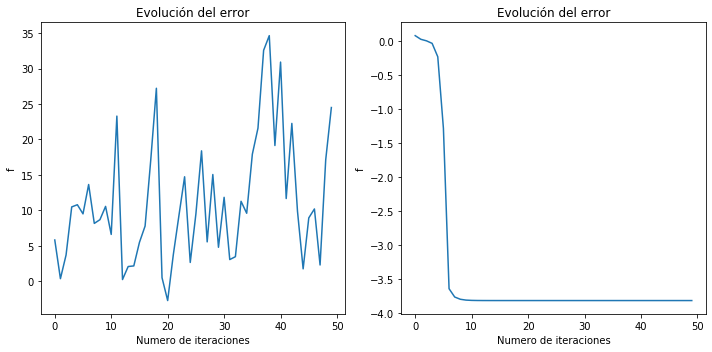

In [9]:
def gradient_decent(lr=0.1, x0=0.1, y0=0.1):
    nIter = 50
    F = np.zeros(nIter) # función de costo
    x, y = x0, y0
    n=0

    ###################################################################
    ############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
    ###################################################################
    for n in range(nIter):
        grad_f = [2*x + 2*np.sin(2*np.pi*y)*np.cos(2*np.pi*x)*4*np.pi,\
                  4*y + 2*np.sin(2*np.pi*x)*np.cos(2*np.pi*y)*4*np.pi]
        x = x - lr*grad_f[0]
        y = y - lr*grad_f[1]

        f = x**2 + 2*y**2 + 2*np.sin(2*np.pi*x)*2*np.sin(2*np.pi*y)

        F[n] = f

    return F

###################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

F_1 = gradient_decent(0.1, 0.1, 0.1)
F_2 = gradient_decent(0.01, 0.1, 0.1)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(F_1)
plt.title('Evolución del error')
plt.xlabel('Numero de iteraciones')
plt.ylabel('f')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(F_2)
plt.title('Evolución del error')
plt.xlabel('Numero de iteraciones')
plt.ylabel('f')
plt.tight_layout()

plt.show()

**R)** Para $lr=0.1$ el error aumenta y decrece porque es muy grande entonces "rebota", con $lr=0.01$ va bajando progresivamente

**Ej1 b)** Obtener las coordenadas del mínimo y su valor para las siguientes condiciones iniciales:

| Condición inicial | ( x, y )* | F* |
| ----------------- | ------ | ----- |
| (0.1, 0.1)        |        |       |
| (1, 1)            |        |       | 
| (-0.5, -0.5)      |        |       |
| (-1, -1) |  |  |

In [23]:
F_0_1 = gradient_decent(0.1, 0.1, 0.1)
F_1 = gradient_decent(0.1, 1, 1)
F_0_5 = gradient_decent(0.1, 0.5, 0.5)
F_neg_1 = gradient_decent(0.1, -1, -1)

def calc_min(F):
    min_val = np.amin(F)
    return val

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(F_1)
plt.title('Evolución del error')
plt.xlabel('Numero de iteraciones')
plt.ylabel('f')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(F_2)
plt.title('Evolución del error')
plt.xlabel('Numero de iteraciones')
plt.ylabel('f')
plt.tight_layout()

plt.show()

20 -2.7386853862894216
22 -2.8956424123318008
29 -1.677345739789003
22 -2.8956424123318008


**Ej1 c)** ¿Qué puede decir respecto a la función a optimizar y la técnica empleada?

In [ ]:
# Se grafica la función de costo para este caso
# Pasar como parámetro el step de la grilla

grid_step = 1
xs = np.arange(-2, 2, grid_step)
yes = np.arange(-2, 2, grid_step)
xx, yy = np.meshgrid(xs, yes)
z = xx**2 + 2*yy**2 + 2*np.sin(2*np.pi*xx) * 2*np.sin(2*np.pi*yy)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,z)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

**Respuesta:**   
... 

<a id="Ejercicio2"></a>
## Ejercicio 2: Regresión lineal mediante descenso por gradiente

En este ejercicio se encontrarán los parámetros de una relación lineal entre dos variables unidimensionales utilizando descenso por gradiente y se lo comparará con el resultado obtenido mediante la solución cerrada vista en el práctico anterior. Para generar una relacion lineal rudiosa entre dos variables $x$ e $y$ se prové la función `generar_relacion_lineal_ruidosa(m, n, N, sigma)`. 

In [24]:
def generar_relacion_lineal_ruidosa(m, n, N, sigma):
    '''
    Entrada:
        m: pendiente de la recta
        n: término independiente
        N: número de puntos a generar
        sigma: desviación estándar del ruido
    Salida:
        x: N valores aleatorios en el rango [-1,1]
        y: resultado de evaluar los N valores de x con el modelo ruidoso
    '''
    x = 2*np.random.rand(N)-1
    senal = m * x + n 
    ruido = sigma * np.random.randn(N)
    y = senal + ruido
    return x, y

La siguiente celda genera dos vectores $\mathbf{x}$, $\mathbf{y}$ y muestra la relación generada

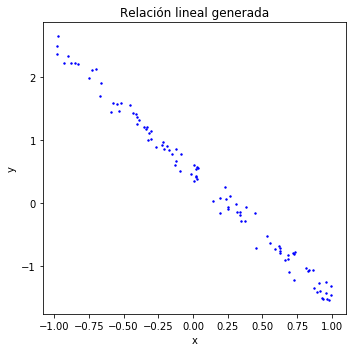

In [25]:
m=-2 ; n=0.5; N=100; sigma=0.1;
x, y = generar_relacion_lineal_ruidosa(m,n,N,sigma)

plt.figure(figsize=(5,5))
plt.scatter(x,y,c='b', s=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Relación lineal generada')
plt.tight_layout()

La función de costo que se minimiza mediante el método de mínimos cuadrados es:

$$
E_{in}(\mathbf{w}) = \frac{1}{2N}\sum_{n=1}^N \left( y_n - \mathbf{w}^T \mathbf{x}_n \right)^2
$$

**Ej2 a)** Encontrar los coeficientes del modelo utilizando la solución cerrada vista en el curso y verificar que los coeficientes obtenidos son similares a los utilizados para generar la señal. Recordar que en el modelo lineal el vector de características $\mathbf{x}_n$ se encuentra expresado en coordenadas homogéneas. 

In [26]:
print(x.shape)

(100,)


In [34]:
###################################################################
############# EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################
X = np.ones((N,2))
X[:,1] = x
X_tras = np.transpose(X)

w_ls = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_tras, X)), X_tras),y)

###################################################################
############# TERMINA ESPACIO PARA COMPLETAR CÓDIGO  ##############
###################################################################

**Ej2 b)**  Calcular el gradiente de la función de costo respecto a los parámetros. 

**Respuesta:**
$$
\nabla E_{in}(w) = \frac{1}{N} \sum_{n=1}^N(w^Tx_n-y_n)x_n
$$

**Ej2 c)** Implementar el método `minimos_cuadrados_mediante_descenso_por_gradiente()` y utilizarla para encontrar los coeficientes del modelo lineal. Notar que el resultado obtenido en la parte anterior utiliza todo el conjunto de entrenamiento para estimar el gradiente. Es por esta razón que a esta forma de calcular el gradiente se la suele llamar *Batch Gradient Descent*

In [ ]:
def minimos_cuadrados_mediante_descenso_por_gradiente(X, y, lr = 0.1, max_iter=1000, 
                                                      delta_w_minimo=1e-8):
    '''
    Entrada:
        
        X: matríz de tamaño Nx(d+1) donde cada fila representa una muestra
        y: vector de tamaño N que contiene las etiquetas
        lr: learning rate
        max_iter: si el número de iteraciones alcanza a max_iter se detiene la optimización.
        delta_w_minimo: si la norma L2 del vector diferencia entre vectores de pesos de dos 
                       iteraciones consecutivos es menor que delta_w_minimo se detiene la optimización
                                  
    Salida:
        ws: lista de tamaño igual al número de iteraciones realizadas que contiene 
            los vectores de pesos encontrados durante el proceso de optimización 
    '''
    N = X.shape[0]
    
    # se inicializan los pesos a valores aleatorios muy pequeños
    w = 1e-6 * np.random.randn(X.shape[1])
    ws = [w.copy()] # se inicializa la lista de pesos
    delta_w = delta_w_minimo + 1 # de esta forma entra seguro al menos una vez
    t=0 # contador de iteraciones
    
    while (t < max_iter and delta_w > delta_w_minimo):
        
        #################################################################################
        #################  EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO ########################
        #################################################################################

        grad_Ein = 1/N*np.sum

        grad_f = [2*x + 2*np.sin(2*np.pi*y)*np.cos(2*np.pi*x)*4*np.pi,\
                  4*y + 2*np.sin(2*np.pi*x)*np.cos(2*np.pi*y)*4*np.pi]
        x = x - lr*grad_f[0]
        y = y - lr*grad_f[1]

        f = x**2 + 2*y**2 + 2*np.sin(2*np.pi*x)*2*np.sin(2*np.pi*y)
        F[n] = f
        
        #################################################################################
        #################  TERMINA ESPACIO PARA COMPLETAR CÓDIGO ########################
        #################################################################################
   
    print("minimos_cuadrados_mediante_descenso_por_gradiente() terminó en la iteración %d" % t )
    ws = np.array(ws)
    
    return ws

In [ ]:
# Se encuentran los coeficientes del modelo utilizando batch gradient descent
max_iter_BGD = 500 
ws_bgd  = minimos_cuadrados_mediante_descenso_por_gradiente(Xh, y, max_iter = max_iter_BGD )
w_bgd = ws_bgd[-1]
print('El w encontrado utilizando batch gradient descent es: ', w_bgd)

### Descenso por gradiente estocástico

Cuando el conjunto de datos de entrenamiento es muy grande, el descenso por gradiente recientemente implementado presenta la desventaja de ser muy lento. Es por eso que en la práctica es muy habitual utilizar una variante llamada *descenso por gradiente estocástico*. En la misma se calcula el gradiente utilizando una sola muestra. 

**Ej2 d)** Implementar `minimos_cuadrados_mediante_descenso_por_gradiente_estocastico()` y utilizarla para encontrar los coeficientes del modelo lineal.

In [ ]:
def minimos_cuadrados_mediante_descenso_por_gradiente_estocastico(X, y, lr = 0.1, 
                                                                max_epocas =1000, 
                                                                delta_w_minimo=1e-8):
    '''
    Entrada:
        
        X: matríz de tamaño Nx(d+1) donde cada fila representa una muestra
        y: vector de tamaño N que contiene las etiquetas
        lr: learning rate
        max_epocas: si el número de épocas alcanza a max_epocas se detiene la optimización.
                    Se llama una época a una pasada completa por el conjunto de 
                    entrenamiento.
        delta_w_minimo: si la norma L2 del vector diferencia entre vectores de pesos de dos 
                        épocas consecutivos es menor que delta_w_minimo se detiene la optimización
                                  
    Salida:
        ws: lista de tamaño igual al número de iteraciones realizadas que contiene los pesos de cada
            iteración
    '''
    
    N = X.shape[0]
    
    # se inicializan los pesos a valores aleatorios muy pequeños
    w = 1e-6 * np.random.randn(X.shape[1])
    ws = [w.copy()]  # se inicializa la lista de pesos
    delta_w = delta_w_minimo + 1 # de esta forma entra seguro al menos una vez
    epoca_actual =0 # contador de épocas
    
    while (epoca_actual < max_epocas and delta_w > delta_w_minimo):
        
        #################################################################################
        #################  EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO ########################
        #################################################################################

        # se guarda el w de la época anterior
        # w_= 
            
        # se sortea el orden en que se visitan las muestras
        # sugerencia: utilizar permutation() del paquete random
        # indices = 
        for i in indices:
            
            # se calcula el gradiente 
            
            
            # se actualiza w

            
            # se almacena el nuevo w
        
        
        # al terminar la época se calcula el delta_w
        # delta_w = 
        
        # se incrementa el valor de la época
        
        #################################################################################
        #################  TERMINA ESPACIO PARA COMPLETAR CÓDIGO ########################
        #################################################################################
    
    print("minimos_cuadrados_mediante_descenso_por_gradiente_estocastico() terminó en la época %d" % epoca_actual )
    ws = np.array(ws)
    
    return ws

In [ ]:
# Se define el número máximo de épocas en descenso por gradiente
# estocástico de forma tal que el número de actualizaciones de los
# pesos sea similar a la de batch gradient descent. Recordar que
# en una época se realizan N actualizaciones de los pesos.
max_epocas_SGD = np.max([max_iter_BGD//N, 1])

ws_sgd  = minimos_cuadrados_mediante_descenso_por_gradiente_estocastico(Xh, y, 
                                                                        max_epocas=max_epocas_SGD)
w_sgd=ws_sgd[-1]
print('El w encontrado utilizando batch gradient descent es: ', w_sgd)

### Evolución del costo en descenso por gradiente

**Ej2 e)** Implementar la función `evolucion_costo_descenso_por_gradiente()` y utilizarla para mostrar las curvas de error en ambos casos. ¿Qué similitudes y diferencias nota entre las curvas obtenidas por ambos métodos?

In [ ]:
def evolucion_costo_descenso_por_gradiente(X, y, ws):
    '''
    Entrada:
        X: Matriz de Nx(d+1) que contiene los puntos a evaluar
        y: vector con los valores de la variable independiente
        ws: lista con los coeficientes del modelo obtenidos en cada actualización
    Salida:
        errores: lista con los errores (mean square errors) estimados en cada paso
    '''
    errores = []
    
    #################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO ########################
    #################################################################################
    
        
    #################################################################################
    #################  TERMINA ESPACIO PARA COMPLETAR CÓDIGO ########################
    #################################################################################
    
    return errores

In [ ]:
#################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO ########################
#################################################################################

# errores_bgd = 

# errores_sgd = 

#################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CÓDIGO ########################
#################################################################################

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.plot(errores_bgd)
plt.title('Costo de descenso por gradiente (batch)')
plt.xlabel('Número de actualizaciones')
plt.subplot(122)
plt.plot(errores_sgd)
plt.title('Costo de descenso por gradiente estocástico')
plt.xlabel('Número de actualizaciones')
plt.tight_layout()

### Evolución de los pesos en descenso por gradiente

La siguiente celda muestra como evolucionan los pesos durante la optimización. Correrla, mirar la animación y utilizarla para explicar el desempeño de ambos métodos.

In [ ]:
fig = plt.figure(figsize=(5, 5))
cost_ax = fig.gca()
cost_ax.plot(w_ls[1], w_ls[0], 'y*')

ms = np.arange(-5., 5, 0.1)
ns = np.arange(-5., 5, 0.1)
mm, nn = np.meshgrid(ms, ns)
costo = np.zeros_like(mm) 
for n in range(N):
    costo += 1/N * (y[n] - (mm * x[n] + nn))**2

cost_img = cost_ax.pcolor(mm, nn, costo)
fig.colorbar(cost_img)

def animar(i):
    
    cost_ax.cla()
    cost_ax.plot(w_ls[1], w_ls[0], 'y*')
    cost_ax.pcolor(mm, nn, costo)
    cost_ax.plot(ws_bgd[:i,1], ws_bgd[:i,0], 'r--')
    cost_ax.plot(ws_sgd[:i,1], ws_sgd[:i,0], 'g--')

    cost_ax.set_xlim([-5, 5])
    cost_ax.set_ylim([-5, 5])

    cost_ax.set_xlabel(r'$m$')
    cost_ax.set_ylabel(r'$n$')
    cost_ax.set_title('Actualización %d' % i)

    cost_ax.legend(('Solucion cerrada', 'BGD', 'SGD'), loc="upper left")
    plt.tight_layout()

nIters = int(np.min([ws_bgd.shape[0],ws_sgd.shape[0]]))
animacion = FuncAnimation(fig, animar, frames=nIters)
plt.show()

**Ej2 e)**  ¿Coinciden las soluciones de los distintos métodos? A modo de resumen comentar en qué  casos le parece conveniente utilizar cada uno de los métodos.  

**Respuesta:**   

...

<a id="Ejercicio3"></a>
## Ejercicio 3:  Regresión Logística

En un problema de dos clases, el modelo de regresión logística asume que la probabilidad a posteriori de pertenencia a la clase positiva puede ser escrita de la siguiente forma:

$$
P(y=1|\mathbf{x}_n;\mathbf{w})= \theta \left( \mathbf{w}^T\mathbf{x}_n \right)= \frac{1}{1+\exp\left(-\left(\mathbf{w}^T\mathbf{x}_n\right)\right)}
$$

donde $\mathbf{x_n}=\left( 1, x_{n1},x_{n2},...,x_{nd}\right)$ es el n-ésimo vector de característcas expresado en coordenadas homogéneas y $d$ es el número de característcas.  

**Ej3 a)** Mostrar que $P(y=y_n|\mathbf{x}_n;\mathbf{w}) = \frac{1}{1+\exp\left(-\left(y_n \mathbf{w}^T\mathbf{x}_n\right)\right)} $

**Solución:**

...

**Ej3 b)** Escribir la log verosimilitud $l(\mathbf{y}| \mathbf{X};\mathbf{w})$ para este modelo en función de la función $\theta(\cdot)$ definida anteriormente. $\mathbf{X}$ es una matriz de $N \times (d+1)$ e $\mathbf{y}$ es un vector que contiene las $N$ etiquetas.

**Solución:**

...

**Ej3 c)** Mostrar que encontrar el $\mathbf{w}$ que maximiza la verosimilitud es equivalente a encontrar el $\mathbf{w}$ que minimiza la función de costo: 

$$
E_{in}(\mathbf{w}) = \frac{1}{N}\sum_{n=1}^N \log \left( 1 + \exp \left( -y_n \mathbf{w}^T\mathbf{x}_n \right) \right)
$$

**Solución:**

...

**Ej3 d)** Mostrar que $$\nabla E_{in}(\mathbf{w}) = \frac{1}{N} \sum_{n=1}^{N} -y_n \mathbf{x}_n \theta  \left( - y_n \mathbf{w}^T\mathbf{x_n} \right) $$

**Respuesta:**    
...


**Ej3 e)** Implementar el método `regresion_logistica()` utilizando alguna de las variantes del método de descenso por gradiente para realizar la optimización

In [ ]:
def regresion_logistica(X, y, lr = 0.1, max_iter=1000, delta_w_minimo=1e-7):
    '''
    Entrada:
        X: matríz de tamaño Nx(d+1) donde cada fila representa una muestra
        y: vector de tamaño N que contiene las etiquetas
        lr: learning rate
        max_iter: si el número de iteraciones alcanza a max_iter se detiene la 
                  optimización.
        delta_w_minimo: si la norma L2 del vector diferencia entre vectores de pesos de 
                        dos iteraciones consecutivos es menor que delta_w_minimo se 
                        detiene la optimización
    Salida:
        w: vector de pesos encontrado
        error: vector de error de tamaño igual al número de iteraciones 
    '''     
    
    # se inicializan los pesos a valores aleatorios muy pequeños
    w = 1e-6 * np.random.randn(X.shape[1])
    error = []
    
    #################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO ########################
    #################################################################################
    
        
    #################################################################################
    #################  TERMINA ESPACIO PARA COMPLETAR CÓDIGO ########################
    #################################################################################
    
    
    return w, error

## Clasificación de Iris

En esta sección se aplicará el modelo de Regresión Logística para clasificar a la flor de Iris. La [base de datos Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) es una de las más conocidas en el área de aprendizaje automático por ser una de las primeras en ser introducidas a la comunidad. El problema original consiste en utilizar cuatro características de las flores (ancho y alto del pétalo y del sépalo) para separar en tres especies diferentes: Virgínica, Versicolor, Setosa.

Se utilizarán los datos disponibles en el [repositorio UCI](https://archive.ics.uci.edu/ml/datasets/iris). La siguiente celda levanta los datos y grafica las características dos a dos.

In [ ]:
data   = np.loadtxt('iris.data', delimiter=',', usecols=[0,1,2,3])
labels = np.loadtxt('iris.data', delimiter=',', usecols=[4], dtype=str)
features_names = ['sepal length','sepal width','petal length','petal width']
labels_names = ['Virginica','Versicolor','Setosa']
N,d = data.shape

In [ ]:
mapa_colores = {'Iris-versicolor': 'r', 'Iris-virginica':'b', 'Iris-setosa':'g' }
colores = [mapa_colores[l] for l in labels]
N,F = data.shape
plt.figure(figsize=(8,8))
for i in range(F):
    for j in range(F):
        plt.subplot(4,4,1+i*F+j)
        if i!=j:
            plt.scatter(data[:,j],data[:,i],s=2, c=colores)
            plt.xlabel(features_names[j])
            plt.ylabel(features_names[i])
        else:
            plt.hist(data[:,i], bins=16, label='hist %s' % features_names[i])
            plt.legend()
plt.tight_layout()

En este ejercicio se separarán las fores de Iris en dos categorías distintas. Implementar la función `preprocesar_iris()` que separa a las especies en dos, asignándoles la etiqueta +1 o -1 y dejándolas prontas para ser utilizadas por la función `regresion_logistica()`.

In [ ]:
def preprocesar_iris(data, labels, clasesPositivas, clasesNegativas, features=[0,1,2,3]):
    
    '''
    Entrada:
        data: matríz de tamaño Nxd con las características de las N muestras
        labels: vector que tiene las N etiquetas asignadas a las muestras
        clasesPositivas: lista de etiquetas que van a asignarse a la clase positiva
        clasesNegativas: lista de etiquetas que van a asignarse a la clase negativa
        features: lista de características a utilizar. Por defecto se usan todas
    Salida:
        X: matríz de tamaño Nx(d+1) con las características a utilizar
        y: vector de N etiquetas, valen +1 o -1
    '''  
    
    # se transforma a coordenadas homogéneas
    X = np.concatenate((np.ones((N,1)),data[:, features]),axis=1)
    y = np.zeros(len(labels))
    for clase in clasesPositivas:
        labels_c = labels == clase
        y[labels_c]=1
    for clase in clasesNegativas:
        labels_c = labels == clase
        y[labels_c]=-1
         
    
    return X, y



## Separación de Iris-virgínica utilizando una característica

Elegir la característica que considere más discriminatoria y utilícela para separar la clase Iris-virgínica de las demás.

In [ ]:
clasesPositivas=['Iris-virginica']
clasesNegativas=['Iris-setosa', 'Iris-versicolor']

#################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO ########################
################################################################################# 

# Se elige la característica más discriminatoria y se obtienen los datos para
# esa característica

# features=[0] 
# Xiris1, y = 

# Se determinan los parámetros del modelo de regresión logística
# w_iris1 = 

# Se calcula el umbral de decisión como el valor en que la probabilidad de pertenecer
# a ambas clases es la misma. 
# umbral = ...

#################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CÓDIGO ########################
################################################################################# 

plt.figure(figsize=(5,5))
plt.plot(error)
plt.title('Evolución del costo en la regresión logística')
plt.tight_layout()

In [ ]:
def mostrar_umbral_clasificacion_iris1D(Xiris, y, umbral):
    '''
    Entrada: 
        Xiris: Matríz de Nx2 que contiene los features en coordenadas homogéneas
        y: vector de etiquetas con valores 1 o -1
        umbral: umbral de decisión enocontrado mediante regresión logística
    '''
    plt.figure(figsize=(5,5))
    plt.scatter(Xiris[y==-1, 1], y[y==-1], s=4,c='y',marker='x', label='negativas')
    plt.scatter(Xiris[y==1,  1], y[y==1],  s=4,c='b',marker='x', label='positivas')
    plt.axvline(umbral)
    plt.title('El umbral de clasificación es %.02f' % umbral)
    plt.tight_layout()
    
mostrar_umbral_clasificacion_iris1D(Xiris1,y,umbral)
    

A diferencia de otros métodos de clasificación, la clasificación mediante regresión logística brinda, para cada muestra, una probabilidad de pertencia a una determinada clase. Implementar el método `predecir_probabilidad_modelo_logistico()` y muestre las curvas de probabilidad de pertenencia a cada clase.

In [ ]:
def predecir_probabilidad_modelo_logistico(X, w):
    
    '''
    Entrada:
        X: matríz de tamaño Nx(d+1) que contiene las características de N muestras
           en coordenadas homogéneas
        w: vector de pesos estimado por modelo logístico
    Salida:
        probabilidades: matríz de tamaño Nx2 que en la primera columna almacena la probabilidad 
                        de pertenencia a la clase positiva y en la segunda la de pertenencia a 
                        la clase negativa
    '''
    
    #################################################################################
    #################  EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO ########################
    ################################################################################# 
    
 
    
    #################################################################################
    #################  TERMINA ESPACIO PARA COMPLETAR CÓDIGO ########################
    ################################################################################# 
    
    return probabilidades

Ejecutar la siguiente celda y verificar que el modelo encontrado es razonable

In [ ]:
# Se muestra el modelo en función de la característica elegida
x = np.linspace(0,Xiris1[:,1].max()+1)
xh = np.hstack((np.ones( (len(x),1) ), x[:,np.newaxis] ))
probs = predecir_probabilidad_modelo_logistico(xh, w_iris1)

plt.figure(figsize=(7,5))
plt.plot(x, probs[:,0], c='b', label='probabilidad positiva')
plt.plot(x, probs[:,1], c='y', label='probabilidad negativa')
plt.scatter(Xiris1[y==-1 ,1], 0*y[y==-1], s=4,c='y',marker='x', label='negativas')
plt.scatter(Xiris1[y==1,  1], y[y==1], s=4, c='b',marker='x', label='positivas')

plt.axvline(umbral, label='umbral = %.02f' % umbral)
plt.legend()
plt.grid()
plt.xlabel(features_names[features[0]])
plt.ylabel('Probabilidad')
plt.title('Probabilidad de pertenecer a la clase Iris-virgínica')
plt.tight_layout()

## Separación de Iris-virgínica utilizando dos característica

Elegir ahora las dos características que considere más discriminatorias y utilícelas para separar la clase Iris-virgínica de las demás. Comente como varía la solucón obtenida en función de los parámetros de optimización del modelo. Para visualizar el modelo obtenido puede ser útil la función `mostrar_lineas_de_nivel_modelo_logisitco()`.

In [ ]:
def mostrar_lineas_de_nivel_modelo_logisitco(X, w_rl):
    '''
    Este método muestra las líneas de isoprobabilidad en el caso de características 2D
    Entrada:
        X: matríz de tamaño Nx3 que en cada fila contiene una muestra (en coordenadas homogéneas)
        w_rl: vector obtenido mediante regresión logística
    '''
    plt.figure()
    x1_min = X[:,1].min(); x1_max = X[:,1].max()
    x2_min = X[:,2].min(); x2_max = X[:,2].max()
    xx = np.linspace(x1_min,x1_max)
    yy = np.linspace(x2_min,x2_max)
    XX, YY = np.meshgrid(xx, yy)
    Zin=np.vstack( (np.ones(XX.size), XX.flatten(),YY.flatten()) ).T
    Z = predecir_probabilidad_modelo_logistico(Zin,w_rl)
    ZZ=np.reshape(Z[:,0],XX.shape)
    plt.scatter(Xiris2[y==1,  1], Xiris2[y==1 ,2],  s=2, c='b',label='positivas')
    plt.scatter(Xiris2[y==-1 ,1], Xiris2[y==-1 ,2], s=2, c='y',label='negativas')
    cs = plt.contour(XX,YY,ZZ,[0.1, 0.25, 0.5, 0.75, 0.9])
    plt.clabel(cs, inline=1, fontsize=10)
    plt.xlabel(features_names[features[0]])
    plt.ylabel(features_names[features[1]])
    plt.axis('equal')
    plt.legend()

In [ ]:
#################################################################################
#################  EMPIEZA ESPACIO PARA COMPLETAR CÓDIGO ########################
################################################################################# 

# Se eligen las características que se consideran más discriminativas 
#features=[0, 1] 


# Se entrena el modelo y se muestran los resultados

#################################################################################
#################  TERMINA ESPACIO PARA COMPLETAR CÓDIGO ########################
################################################################################# 